In [126]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [186]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [188]:
df = pd.read_csv("UrbanAirPollutionDataset.csv")
df.drop(columns=['Station_ID'], inplace=True)
df.drop(columns=['Rain_mm'],inplace=True)
df["DateTime"] = pd.to_datetime(df["DateTime"], dayfirst=True)
df.head()

,DateTime,PM2.5,PM10,NO2,SO2,CO,O2,Temp_C,Humidity_%,Wind_Speed_mps,Wind_Direction_deg,Pressure,AQI_Target
0,2020-01-01 00:00:00,86.397213,111.814972,26.599649,3.875088,0.570793,42.903768,31.491409,45.704988,3.114026,166.148254,1012.641964,59.759255
1,2020-01-01 01:00:00,73.311679,110.919391,18.585412,11.820056,0.562121,15.127661,24.191965,41.544655,3.480094,282.158060,1011.779447,45.256996
2,2020-01-01 02:00:00,61.359818,47.063317,20.605215,16.531417,0.466105,32.752213,30.719383,73.849227,4.949460,109.450898,1004.118484,43.411916
3,2020-01-01 03:00:00,54.081632,122.981322,14.682654,14.453442,0.607025,18.910033,18.243150,42.086443,1.834147,229.796006,1009.154244,35.227619
4,2020-01-01 04:00:00,43.221175,102.259958,41.515463,17.495670,0.537119,39.582884,33.949777,42.393921,1.987593,159.501370,1021.100094,41.981803


In [190]:
df["Month"] = df["DateTime"].dt.month

def get_season(month):
    if month in [11, 12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9, 10]:
        return "Monsoon"


df["Season"] = df["Month"].apply(get_season)




In [192]:
df.drop(columns=['Month'],inplace=True)


In [194]:
df.drop(columns=['DateTime'],inplace=True)

In [196]:
df.head()

,PM2.5,PM10,NO2,SO2,CO,O2,Temp_C,Humidity_%,Wind_Speed_mps,Wind_Direction_deg,Pressure,AQI_Target,Season
0,86.397213,111.814972,26.599649,3.875088,0.570793,42.903768,31.491409,45.704988,3.114026,166.148254,1012.641964,59.759255,Winter
1,73.311679,110.919391,18.585412,11.820056,0.562121,15.127661,24.191965,41.544655,3.480094,282.158060,1011.779447,45.256996,Winter
2,61.359818,47.063317,20.605215,16.531417,0.466105,32.752213,30.719383,73.849227,4.949460,109.450898,1004.118484,43.411916,Winter
3,54.081632,122.981322,14.682654,14.453442,0.607025,18.910033,18.243150,42.086443,1.834147,229.796006,1009.154244,35.227619,Winter
4,43.221175,102.259958,41.515463,17.495670,0.537119,39.582884,33.949777,42.393921,1.987593,159.501370,1021.100094,41.981803,Winter


In [198]:
df.isna().sum()

PM2.5                 0
PM10                  0
NO2                   0
SO2                   0
CO                    0
O2                    0
Temp_C                0
Humidity_%            0
Wind_Speed_mps        0
Wind_Direction_deg    0
Pressure              0
AQI_Target            0
Season                0
dtype: int64

In [200]:
df.describe

<bound method NDFrame.describe of              PM2.5        PM10        NO2        SO2        CO         O2  \
0        86.397213  111.814972  26.599649   3.875088  0.570793  42.903768   
1        73.311679  110.919391  18.585412  11.820056  0.562121  15.127661   
2        61.359818   47.063317  20.605215  16.531417  0.466105  32.752213   
3        54.081632  122.981322  14.682654  14.453442  0.607025  18.910033   
4        43.221175  102.259958  41.515463  17.495670  0.537119  39.582884   
...            ...         ...        ...        ...       ...        ...   
175200   60.010320   95.408779  38.985652   9.635815  0.455887  37.390524   
175201   85.776727  111.944941  20.843777   9.536969  0.764993  38.506328   
175202   57.836385  113.044005  20.541992   8.475458  0.401075  52.263306   
175203   58.691021   36.132643  42.932013  19.279567  0.506091  26.699367   
175204  111.487302   93.435727  40.460490  18.337540  1.000370  18.391326   

           Temp_C  Humidity_%  Wind_Speed

In [202]:
print(df["Season"].value_counts())

Season
Monsoon    73440
Winter     57605
Summer     44160
Name: count, dtype: int64


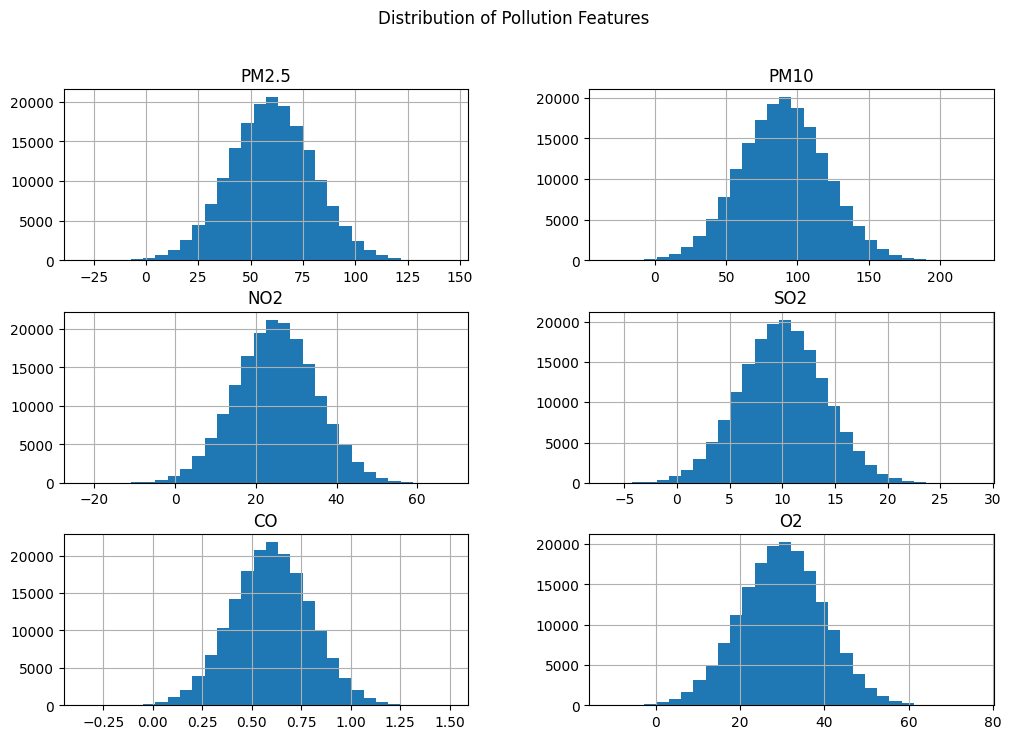

In [204]:
pollution_features = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O2"]

df[pollution_features].hist(
    figsize=(12, 8),
    bins=30
)

plt.suptitle("Distribution of Pollution Features")
plt.show()


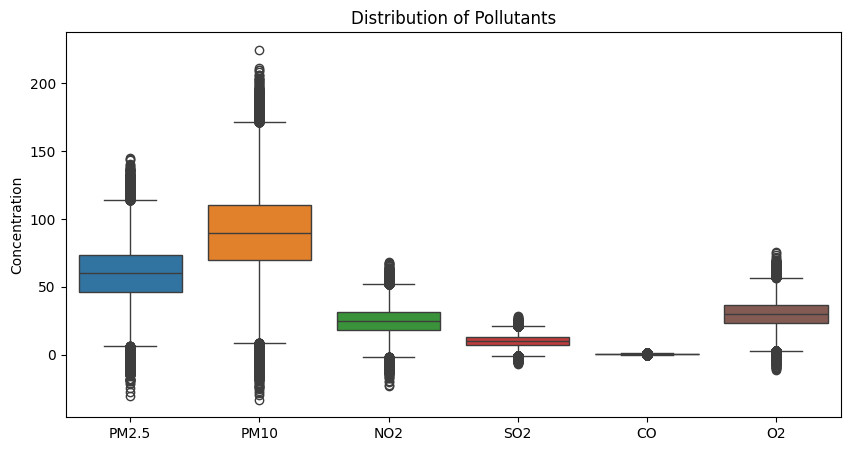

In [205]:
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O2"]

plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutants])
plt.title("Distribution of Pollutants")
plt.ylabel("Concentration")
plt.show()


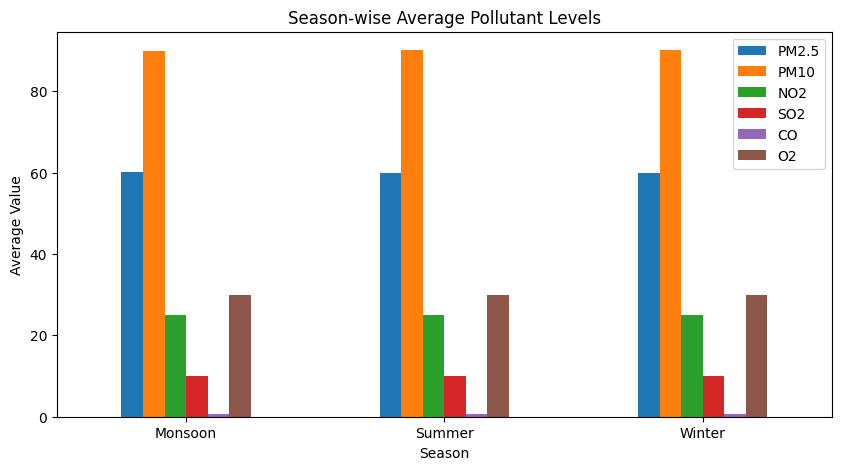

In [206]:
season_pollution = df.groupby("Season")[pollutants].mean()

season_pollution.plot(kind="bar", figsize=(10,5))
plt.title("Season-wise Average Pollutant Levels")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.show()


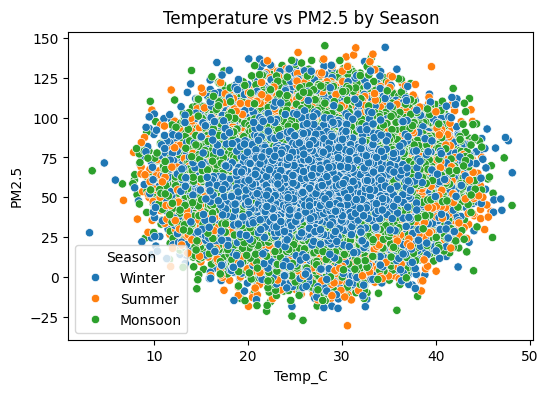

In [207]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="Temp_C",
    y="PM2.5",
    hue="Season"
)
plt.title("Temperature vs PM2.5 by Season")
plt.show()


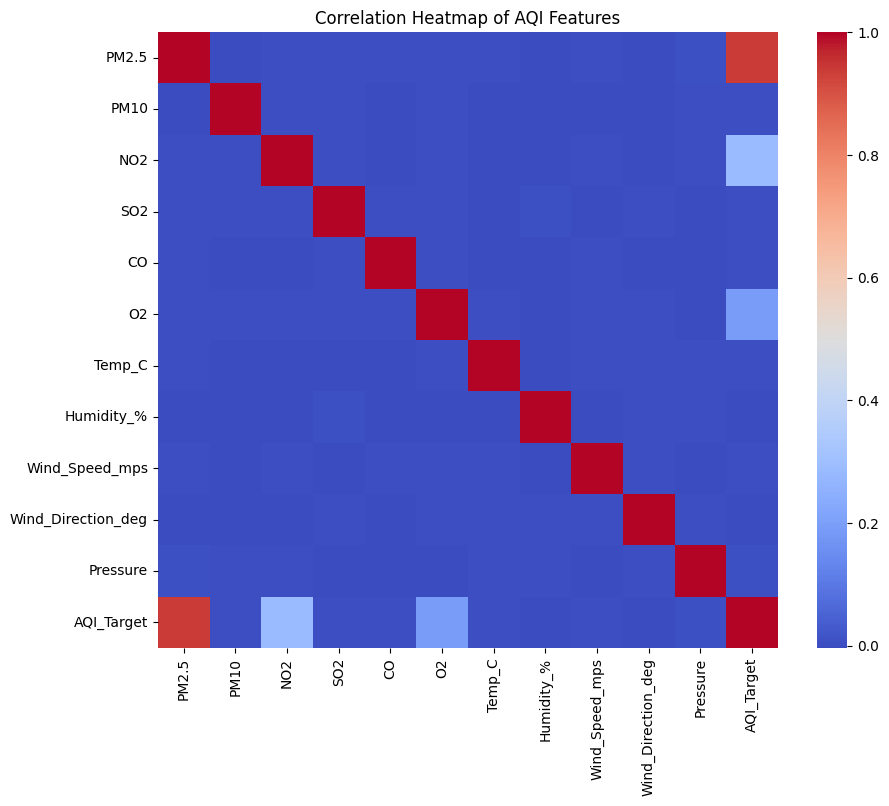

In [208]:
plt.figure(figsize=(10,8))
corr = df.drop(columns=["Season"]).corr()

sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of AQI Features")
plt.show()


In [209]:
Q1 = df['PM10'].quantile(0.25)
Q3 = df['PM10'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['PM10'] < Q1 - 1.5*IQR) | (df['PM10'] > Q3 + 1.5*IQR)]
len(outliers)


1190

In [211]:
pollution_features = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O2"]
weather_features = ["Temp_C", "Humidity_%", "Pressure", "Wind_Speed_mps","Wind_Speed_deg"]



In [212]:
X = df[pollution_features]
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [221]:
inertia = []
k_range = range(2, 9)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

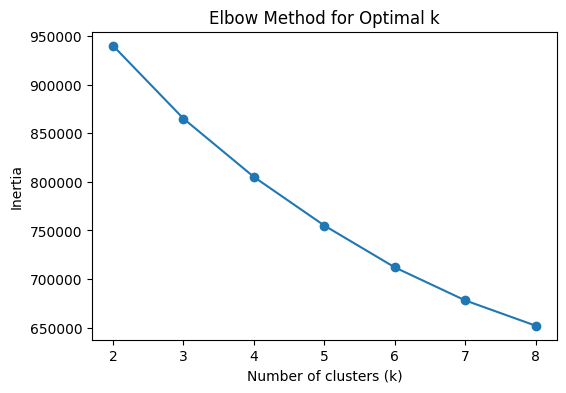

In [229]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


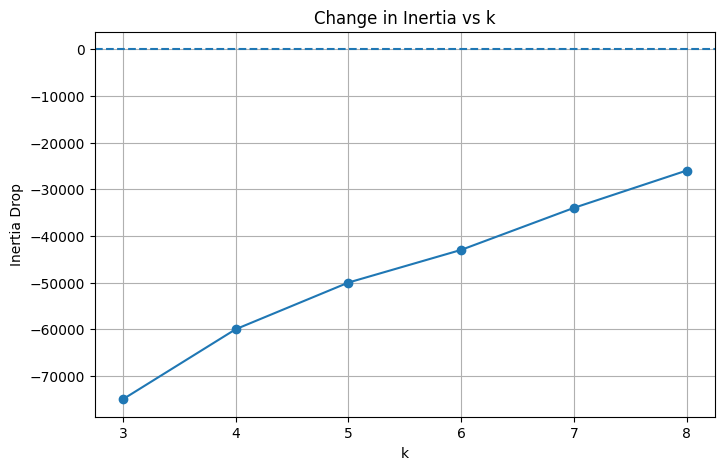

In [227]:
import numpy as np
import matplotlib.pyplot as plt

k = np.array([2, 3, 4, 5, 6, 7, 8])
inertia = np.array([940000, 865000, 805000, 755000, 712000, 678000, 652000])

diff = np.diff(inertia)

plt.figure(figsize=(8,5))
plt.plot(k[1:], diff, marker='o')
plt.axhline(y=0, linestyle='--')

plt.xlabel("k")
plt.ylabel("Inertia Drop")
plt.title("Change in Inertia vs k")
plt.grid(True)
plt.show()


In [231]:
df = df.reset_index(drop=True)


In [233]:

k = 4
seasonal_models = {}
for season in ["Summer", "Winter", "Monsoon"]:

    
    season_idx = df[df["Season"] == season].index

  
    X_season_scaled = X_scaled[season_idx]

   
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_season_scaled)

    
    seasonal_models[season] = {
        "indices": season_idx,
        "labels": labels,
        "centroids": kmeans.cluster_centers_
    }


    df.loc[season_idx, "Cluster"] = labels


In [235]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]


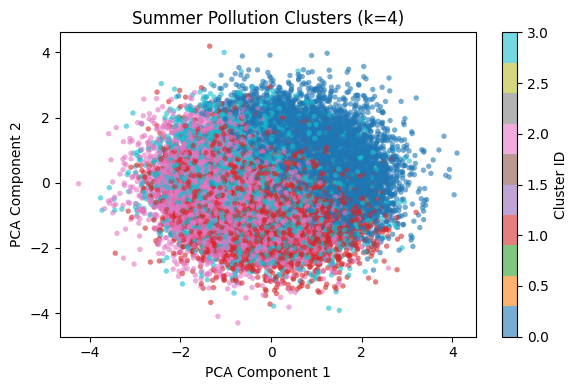

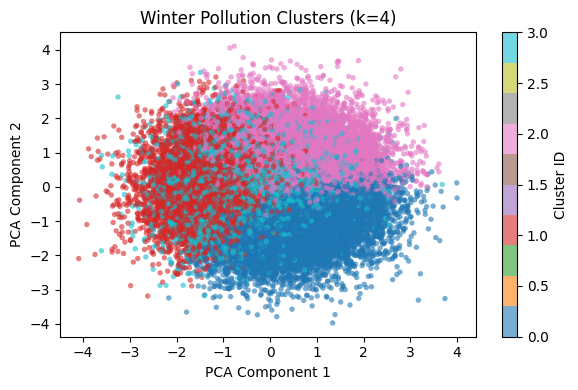

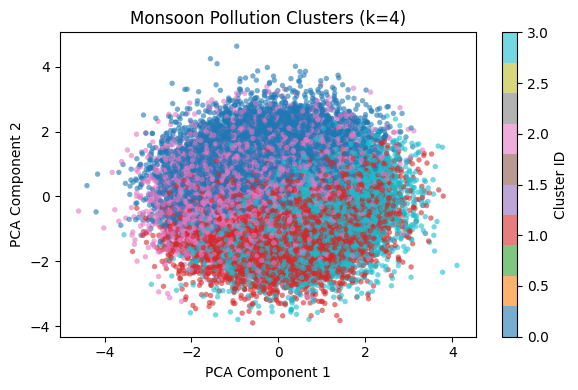

In [243]:
import matplotlib.pyplot as plt

for season in ["Summer", "Winter", "Monsoon"]:
    subset = df[df["Season"] == season]

    plt.figure(figsize=(6,4))
    plt.scatter(
        subset["PCA1"],
        subset["PCA2"],
        c=subset["Cluster"],
        cmap="tab10",
        alpha=0.6,
        s=15,
        edgecolors="none"
    )

    plt.title(f"{season} Pollution Clusters (k=4)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster ID")
    plt.tight_layout()
    plt.show()


<Figure size 600x400 with 0 Axes>

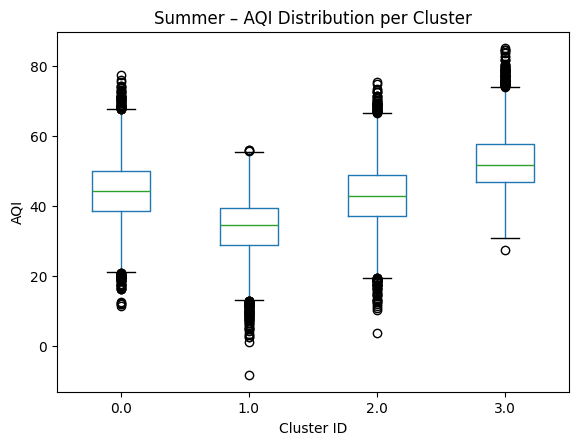

<Figure size 600x400 with 0 Axes>

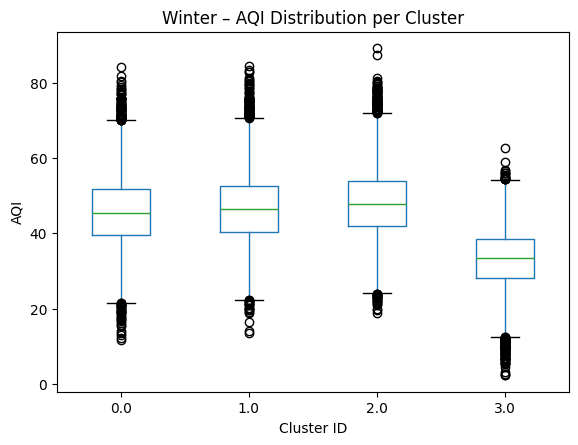

<Figure size 600x400 with 0 Axes>

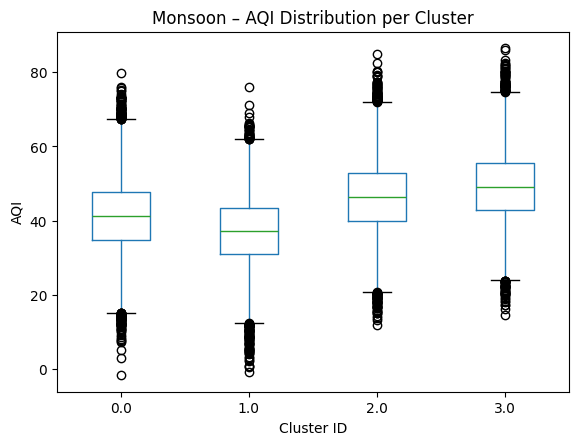

In [241]:
#boxplot per cluster

for season in ["Summer", "Winter", "Monsoon"]:
    subset = df[df["Season"] == season]

    plt.figure(figsize=(6,4))
    subset.boxplot(
        column="AQI_Target",
        by="Cluster",
        grid=False
    )

    plt.title(f"{season} – AQI Distribution per Cluster")
    plt.suptitle("")  
    plt.xlabel("Cluster ID")
    plt.ylabel("AQI")
    plt.show()


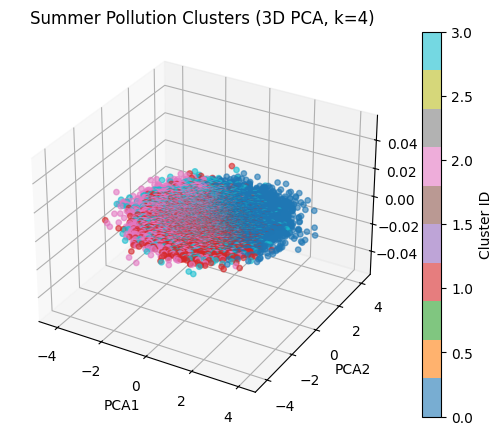

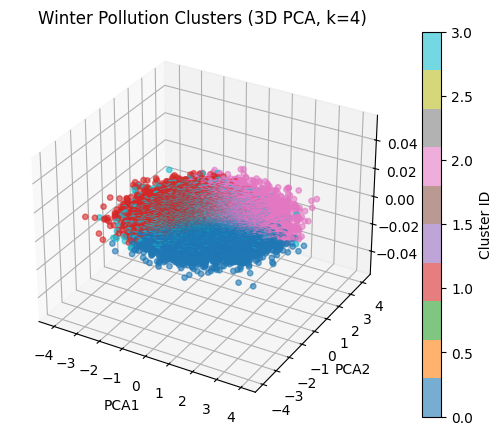

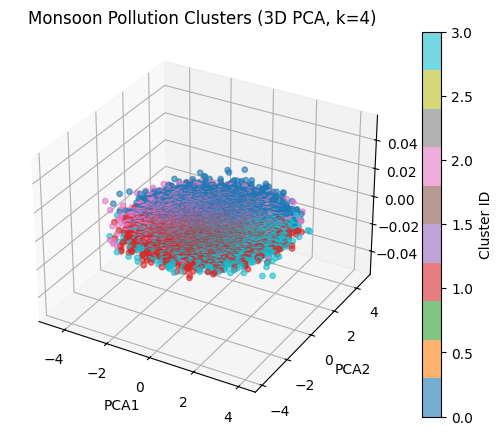

In [247]:
#3D scatter
from mpl_toolkits.mplot3d import Axes3D

for season in ["Summer", "Winter", "Monsoon"]:
    subset = df[df["Season"] == season]

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        subset["PCA1"],
        subset["PCA2"],
        c=subset["Cluster"],
        cmap="tab10",
        alpha=0.6,
        s=15
    )

    ax.set_title(f"{season} Pollution Clusters (3D PCA, k=4)")
    ax.set_xlabel("PCA1")
    ax.set_ylabel("PCA2")

    fig.colorbar(scatter, label="Cluster ID")
    plt.show()


In [249]:
from sklearn.metrics import pairwise_distances
def centroid_drift(c1, c2):
    dist = pairwise_distances(c1, c2)
    return dist.min(axis=1)
drift_winter_summer = centroid_drift(
    seasonal_models["Winter"]["centroids"],
    seasonal_models["Summer"]["centroids"]
)

drift_summer_monsoon = centroid_drift(
    seasonal_models["Summer"]["centroids"],
    seasonal_models["Monsoon"]["centroids"]
)

print("Winter → Summer Drift:", drift_winter_summer)
print("Summer → Monsoon Drift:", drift_summer_monsoon)


Winter → Summer Drift: [1.61732385 1.0360133  1.17196306 1.13501937]
Summer → Monsoon Drift: [1.4500116  1.21287448 1.18940913 1.54701076]


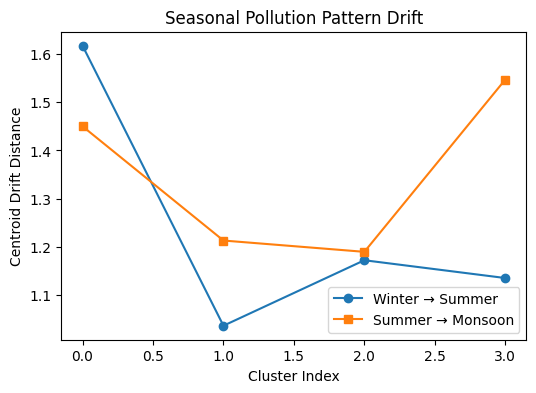

In [255]:
plt.figure(figsize=(6,4))
plt.plot(drift_winter_summer, marker='o', label="Winter → Summer")
plt.plot(drift_summer_monsoon, marker='s', label="Summer → Monsoon")
plt.xlabel("Cluster Index")
plt.ylabel("Centroid Drift Distance")
plt.title("Seasonal Pollution Pattern Drift")
plt.legend()
plt.show()


In [251]:
df.head()

,PM2.5,PM10,NO2,SO2,CO,O2,Temp_C,Humidity_%,Wind_Speed_mps,Wind_Direction_deg,Pressure,AQI_Target,Season,Cluster,PCA1,PCA2
0,86.397213,111.814972,26.599649,3.875088,0.570793,42.903768,31.491409,45.704988,3.114026,166.148254,1012.641964,59.759255,Winter,0.0,0.586074,-0.786331
1,73.311679,110.919391,18.585412,11.820056,0.562121,15.127661,24.191965,41.544655,3.480094,282.158060,1011.779447,45.256996,Winter,1.0,-0.609278,-0.242915
2,61.359818,47.063317,20.605215,16.531417,0.466105,32.752213,30.719383,73.849227,4.949460,109.450898,1004.118484,43.411916,Winter,2.0,-0.233945,0.931531
3,54.081632,122.981322,14.682654,14.453442,0.607025,18.910033,18.243150,42.086443,1.834147,229.796006,1009.154244,35.227619,Winter,3.0,-0.101893,0.033713
4,43.221175,102.259958,41.515463,17.495670,0.537119,39.582884,33.949777,42.393921,1.987593,159.501370,1021.100094,41.981803,Winter,2.0,2.312123,0.376299


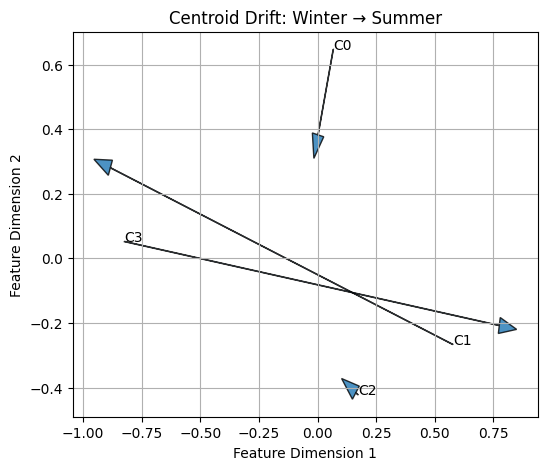

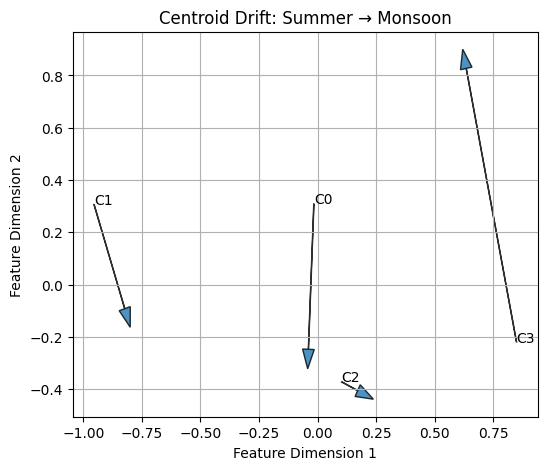

In [253]:
def plot_centroid_drift(c1, c2, season_from, season_to):
    """
    c1, c2: centroid arrays of shape (k, n_features)
    """

    plt.figure(figsize=(6,5))

    for i in range(c1.shape[0]):
        plt.arrow(
            c1[i, 0], c1[i, 1],
            c2[i, 0] - c1[i, 0],
            c2[i, 1] - c1[i, 1],
            head_width=0.05,
            length_includes_head=True,
            alpha=0.8
        )
        plt.text(c1[i, 0], c1[i, 1], f"C{i}", fontsize=10)

    plt.title(f"Centroid Drift: {season_from} → {season_to}")
    plt.xlabel("Feature Dimension 1")
    plt.ylabel("Feature Dimension 2")
    plt.grid(True)
    plt.show()
plot_centroid_drift(
    seasonal_models["Winter"]["centroids"],
    seasonal_models["Summer"]["centroids"],
    "Winter", "Summer"
)

plot_centroid_drift(
    seasonal_models["Summer"]["centroids"],
    seasonal_models["Monsoon"]["centroids"],
    "Summer", "Monsoon"
)


In [257]:

winter_summer = np.array(drift_winter_summer)
summer_monsoon = np.array(drift_summer_monsoon)

total_drift = winter_summer + summer_monsoon

stability_df = pd.DataFrame({
    "Cluster": range(len(total_drift)),
    "Winter→Summer Drift": winter_summer,
    "Summer→Monsoon Drift": summer_monsoon,
    "Total Drift": total_drift
})


stability_df["Stability Rank"] = stability_df["Total Drift"].rank(method="min")

stability_df.sort_values("Stability Rank")


,Cluster,Winter→Summer Drift,Summer→Monsoon Drift,Total Drift,Stability Rank
1,1,1.036013,1.212874,2.248888,1.0
2,2,1.171963,1.189409,2.361372,2.0
3,3,1.135019,1.547011,2.682030,3.0
0,0,1.617324,1.450012,3.067335,4.0


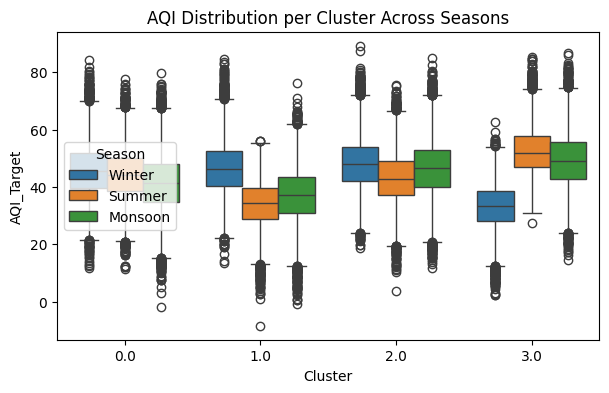

In [259]:
import seaborn as sns

plt.figure(figsize=(7,4))
sns.boxplot(
    data=df,
    x="Cluster",
    y="AQI_Target",
    hue="Season"
)
plt.title("AQI Distribution per Cluster Across Seasons")
plt.show()


In [263]:
import numpy as np
def compute_cluster_variance(X, labels):
    variances = {}
    for c in np.unique(labels):
        cluster_points = X[labels == c]
        variances[c] = np.mean(np.var(cluster_points, axis=0))
    return variances
def split_clusters(X, labels, variance_threshold):
    new_labels = labels.copy()
    max_label = labels.max()

    variances = compute_cluster_variance(X, labels)

    for cluster_id, var in variances.items():
        if var > variance_threshold:
            points_idx = np.where(labels == cluster_id)[0]
            if len(points_idx) > 10: 

                sub_kmeans = KMeans(n_clusters=2, random_state=42)
                sub_labels = sub_kmeans.fit_predict(X[points_idx])

                new_labels[points_idx[sub_labels == 0]] = cluster_id
                new_labels[points_idx[sub_labels == 1]] = max_label + 1
                max_label += 1

    return new_labels
def merge_clusters(X, labels, merge_threshold):
    unique_clusters = np.unique(labels)
    centroids = []

    for c in unique_clusters:
        centroids.append(X[labels == c].mean(axis=0))

    centroids = np.array(centroids)
    dist_matrix = pairwise_distances(centroids)

    merged_labels = labels.copy()

    for i in range(len(unique_clusters)):
        for j in range(i+1, len(unique_clusters)):
            if dist_matrix[i, j] < merge_threshold:
                merged_labels[labels == unique_clusters[j]] = unique_clusters[i]

    return merged_labels


In [349]:
for season in ["Summer", "Winter", "Monsoon"]:

    season_idx = df[df["Season"] == season].index
    X_season = X_scaled[season_idx]
    labels = df.loc[season_idx, "Cluster"].values.astype(int)

    variances = compute_cluster_variance(X_season, labels)

    variance_threshold = np.mean(list(variances.values())) * 0.95


    labels = split_clusters(
        X_season,
        labels,
        variance_threshold=variance_threshold
    )

    labels = merge_clusters(
        X_season,
        labels,
        merge_threshold=2.0
    )

    df.loc[season_idx, "Evolved_Cluster"] = labels


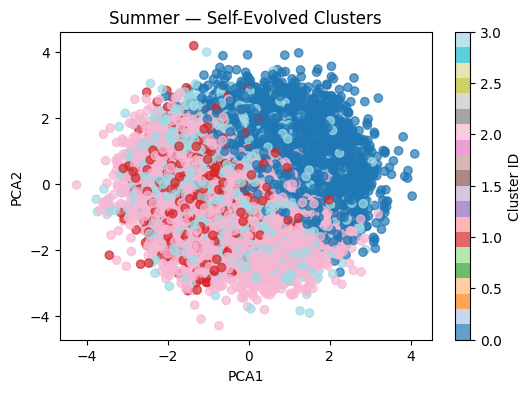

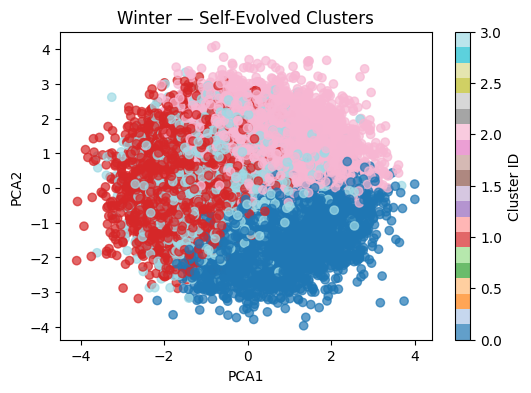

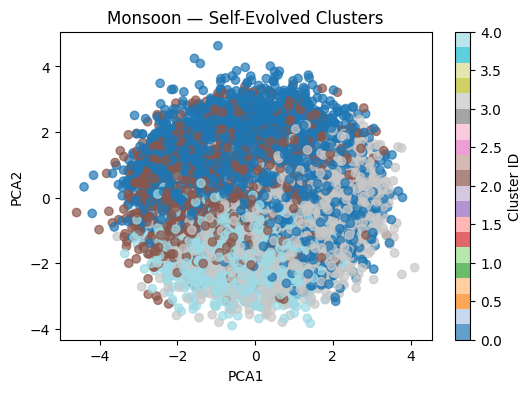

In [351]:
for season in ["Summer", "Winter", "Monsoon"]:
    subset = df[df["Season"] == season]

    plt.figure(figsize=(6,4))
    plt.scatter(
        subset["PCA1"],
        subset["PCA2"],
        c=subset["Evolved_Cluster"],
        cmap="tab20",
        alpha=0.7
    )
    plt.title(f"{season} — Self-Evolved Clusters")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.colorbar(label="Cluster ID")
    plt.show()


In [352]:
pollutant_source_map = {
    "PM2.5": "Vehicular",
    "PM10": "Dust",
    "NO2": "Vehicular",
    "SO2": "Industrial",
    "CO": "Industrial",
    "O2": "Photochemical"
}


In [353]:
#confidence score
def compute_source_confidence(centroid, features):

    # Step 1: absolute contribution of each pollutant
    contributions = np.abs(centroid)

    # Step 2: normalize contributions
    total = contributions.sum()
    if total == 0:
        return {}

    normalized = contributions / total

    # Step 3: aggregate by source
    source_confidence = {}

    for value, feature in zip(normalized, features):
        source = pollutant_source_map[feature]
        source_confidence[source] = source_confidence.get(source, 0) + value

    # Step 4: convert to percentage
    for source in source_confidence:
        source_confidence[source] = round(source_confidence[source] * 100, 2)

    return source_confidence


In [354]:
confidence_results = {}
for season in ["Summer", "Winter", "Monsoon"]:

    confidence_results[season] = {}

    season_idx = df[df["Season"] == season].index
    X_season = X_scaled[season_idx]
    labels = df.loc[season_idx, "Evolved_Cluster"].values.astype(int)

    unique_clusters = np.unique(labels)

    for cluster_id in unique_clusters:
        cluster_points = X_season[labels == cluster_id]

        centroid = cluster_points.mean(axis=0)

        confidence = compute_source_confidence(
            centroid,
            pollution_features
        )

        confidence_results[season][f"Cluster_{cluster_id}"] = confidence


In [355]:
for season, clusters in confidence_results.items():
    print(f"\n===== {season} =====")
    for cluster, confidence in clusters.items():
        print(cluster, "→", confidence)



===== Summer =====
Cluster_0 → {'Vehicular': 2.6, 'Dust': 13.81, 'Industrial': 60.29, 'Photochemical': 23.31}
Cluster_1 → {'Vehicular': 56.2, 'Dust': 5.55, 'Industrial': 31.82, 'Photochemical': 6.44}
Cluster_2 → {'Vehicular': 32.33, 'Dust': 6.2, 'Industrial': 26.23, 'Photochemical': 35.24}
Cluster_3 → {'Vehicular': 41.01, 'Dust': 9.2, 'Industrial': 30.95, 'Photochemical': 18.84}

===== Winter =====
Cluster_0 → {'Vehicular': 21.73, 'Dust': 27.11, 'Industrial': 43.59, 'Photochemical': 7.57}
Cluster_1 → {'Vehicular': 34.24, 'Dust': 11.55, 'Industrial': 11.68, 'Photochemical': 42.53}
Cluster_2 → {'Vehicular': 27.88, 'Dust': 15.46, 'Industrial': 34.75, 'Photochemical': 21.91}
Cluster_3 → {'Vehicular': 83.78, 'Dust': 2.49, 'Industrial': 4.98, 'Photochemical': 8.75}

===== Monsoon =====
Cluster_0 → {'Vehicular': 30.84, 'Dust': 17.23, 'Industrial': 24.03, 'Photochemical': 27.9}
Cluster_2 → {'Vehicular': 37.45, 'Dust': 17.45, 'Industrial': 14.8, 'Photochemical': 30.29}
Cluster_3 → {'Vehicular'

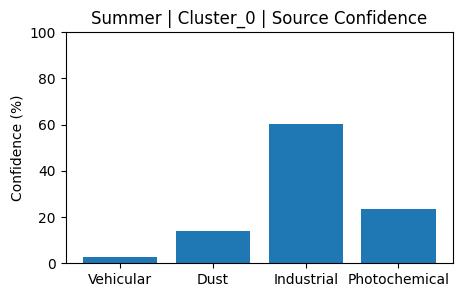

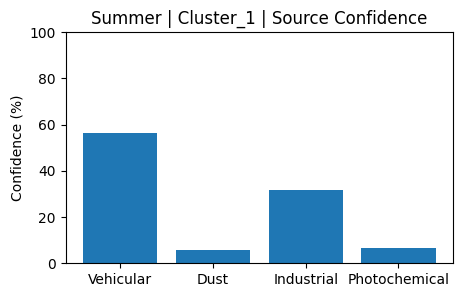

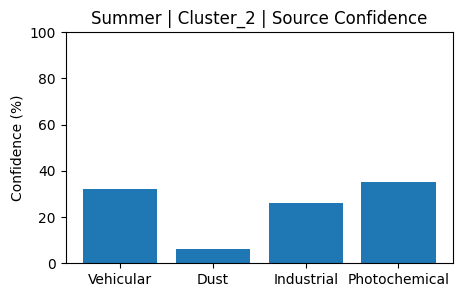

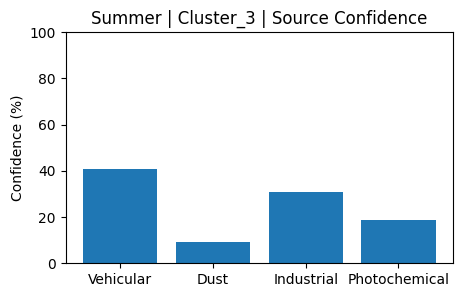

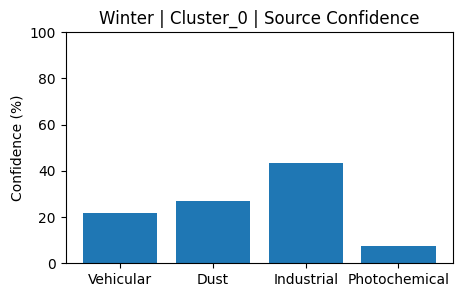

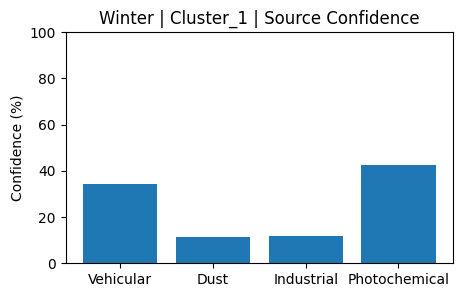

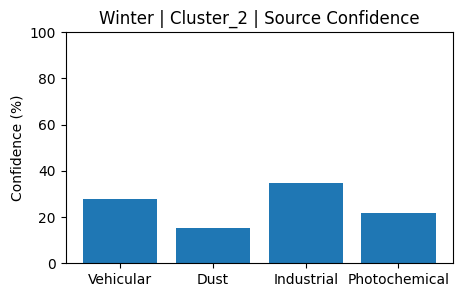

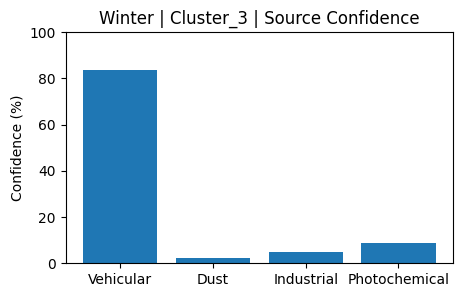

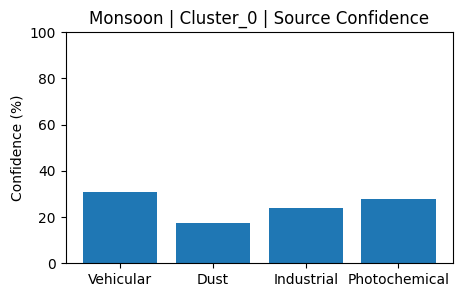

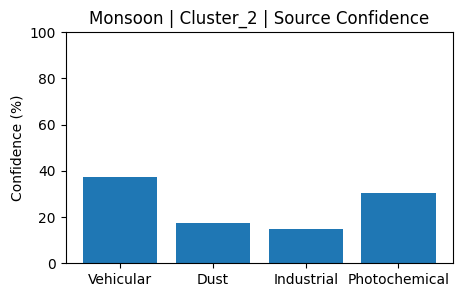

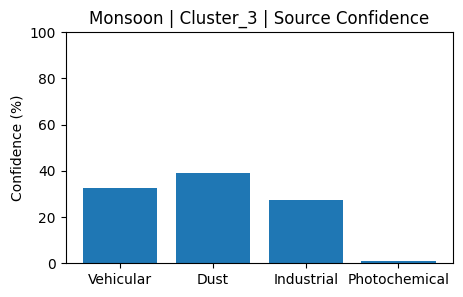

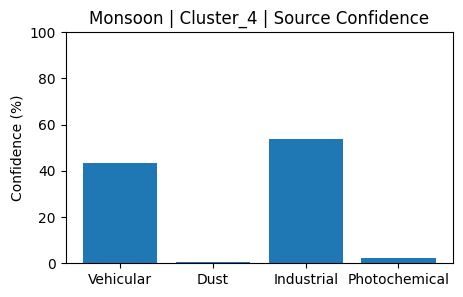

In [356]:
for season, clusters in confidence_results.items():
    for cluster, confidence in clusters.items():

        plt.figure(figsize=(5,3))
        plt.bar(confidence.keys(), confidence.values())
        plt.title(f"{season} | {cluster} | Source Confidence")
        plt.ylabel("Confidence (%)")
        plt.ylim(0, 100)
        plt.show()



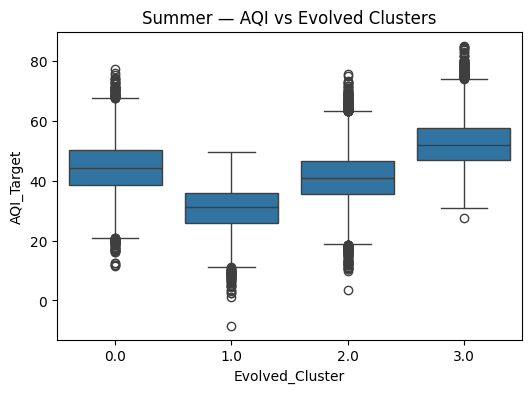

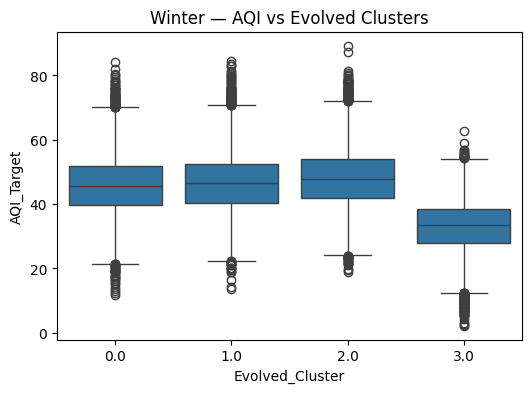

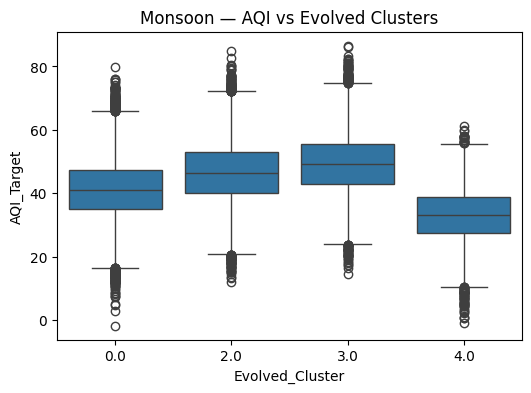

In [357]:
for season in ["Summer", "Winter", "Monsoon"]:
    subset = df[df["Season"] == season]

    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=subset,
        x="Evolved_Cluster",
        y="AQI_Target"
    )
    plt.title(f"{season} — AQI vs Evolved Clusters")
    plt.show()


In [358]:
season_source_summary = []

for season, clusters in confidence_results.items():
    for cluster, sources in clusters.items():
        row = {"Season": season}
        row.update(sources)
        season_source_summary.append(row)

summary_df = pd.DataFrame(season_source_summary)
summary_df = summary_df.fillna(0)
season_avg = summary_df.groupby("Season").mean()
print(season_avg)





         Vehicular     Dust  Industrial  Photochemical
Season                                                
Monsoon    36.1250  18.5150     30.0050        15.3550
Summer     33.0350   8.6900     37.3225        20.9575
Winter     41.9075  14.1525     23.7500        20.1900


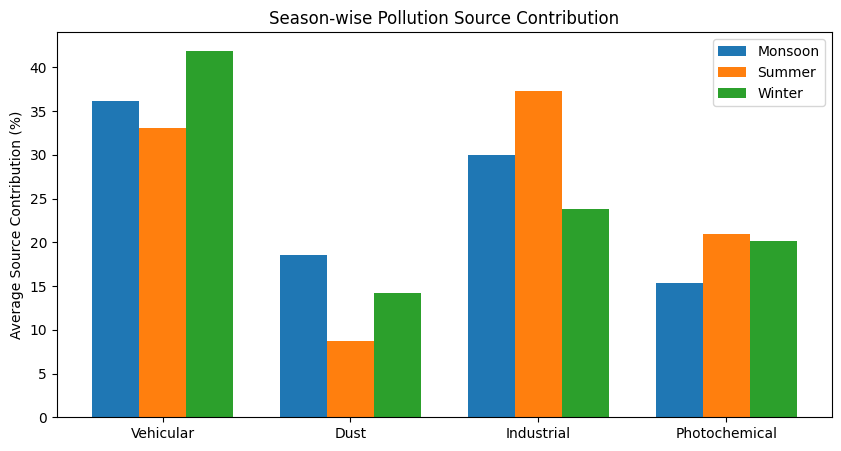

In [367]:
sources = season_avg.columns
seasons = season_avg.index

x = np.arange(len(sources))
width = 0.25

plt.figure(figsize=(10,5))

for i, season in enumerate(seasons):
    plt.bar(
        x + i * width,
        season_avg.loc[season],
        width,
        label=season
    )

plt.xticks(x + width, sources)
plt.ylabel("Average Source Contribution (%)")
plt.title("Season-wise Pollution Source Contribution")
plt.legend()
plt.show()


In [369]:
#cluster stability score
season_cluster_centroids = {}

for season in ["Summer", "Winter", "Monsoon"]:
    season_cluster_centroids[season] = {}

    season_idx = df[df["Season"] == season].index
    X_season = X_scaled[season_idx]
    labels = df.loc[season_idx, "Evolved_Cluster"].values.astype(int)

    for cluster_id in np.unique(labels):
        centroid = X_season[labels == cluster_id].mean(axis=0)
        season_cluster_centroids[season][cluster_id] = centroid


In [371]:
all_clusters = set()

for season in season_cluster_centroids:
    all_clusters.update(season_cluster_centroids[season].keys())


In [373]:
def centroid_consistency(centroids):
    if len(centroids) < 2:
        return 0.0

    distances = pairwise_distances(centroids)
    avg_distance = distances[np.triu_indices(len(centroids), 1)].mean()

    # Convert distance to stability (smaller distance = higher stability)
    return 1 / (1 + avg_distance)
cluster_stability = {}
total_seasons = 3

for cluster_id in all_clusters:

    centroids = []
    seasons_present = 0

    for season in ["Summer", "Winter", "Monsoon"]:
        if cluster_id in season_cluster_centroids[season]:
            centroids.append(season_cluster_centroids[season][cluster_id])
            seasons_present += 1

    presence_score = seasons_present / total_seasons
    consistency_score = centroid_consistency(np.array(centroids))

    # Final stability score (weighted)
    stability_score = round(
        0.6 * presence_score + 0.4 * consistency_score, 3
    )

    cluster_stability[cluster_id] = {
        "presence_score": round(presence_score, 3),
        "consistency_score": round(consistency_score, 3),
        "stability_score": stability_score
    }


In [375]:
for cluster, scores in cluster_stability.items():
    print(f"Cluster {cluster} → {scores}")


Cluster 0 → {'presence_score': 1.0, 'consistency_score': 0.387, 'stability_score': 0.755}
Cluster 1 → {'presence_score': 0.667, 'consistency_score': 0.337, 'stability_score': 0.535}
Cluster 2 → {'presence_score': 1.0, 'consistency_score': 0.419, 'stability_score': 0.768}
Cluster 3 → {'presence_score': 1.0, 'consistency_score': 0.354, 'stability_score': 0.742}
Cluster 4 → {'presence_score': 0.333, 'consistency_score': 0.0, 'stability_score': 0.2}


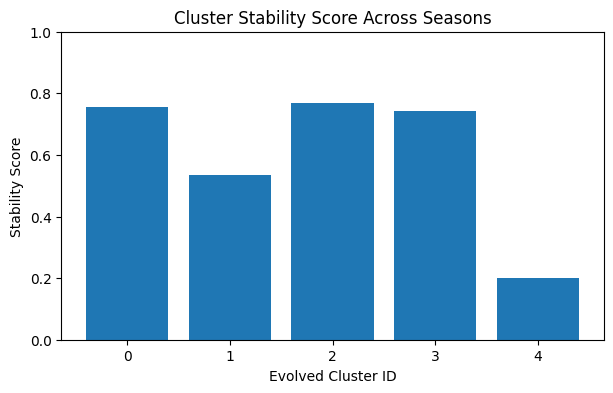

In [377]:
clusters = list(cluster_stability.keys())
scores = [cluster_stability[c]["stability_score"] for c in clusters]

plt.figure(figsize=(7,4))
plt.bar(clusters, scores)
plt.xlabel("Evolved Cluster ID")
plt.ylabel("Stability Score")
plt.title("Cluster Stability Score Across Seasons")
plt.ylim(0, 1)
plt.show()


In [379]:
df.head()

,PM2.5,PM10,NO2,SO2,CO,O2,Temp_C,Humidity_%,Wind_Speed_mps,Wind_Direction_deg,Pressure,AQI_Target,Season,Cluster,PCA1,PCA2,Evolved_Cluster
0,86.397213,111.814972,26.599649,3.875088,0.570793,42.903768,31.491409,45.704988,3.114026,166.148254,1012.641964,59.759255,Winter,0.0,0.586074,-0.786331,0.0
1,73.311679,110.919391,18.585412,11.820056,0.562121,15.127661,24.191965,41.544655,3.480094,282.158060,1011.779447,45.256996,Winter,1.0,-0.609278,-0.242915,1.0
2,61.359818,47.063317,20.605215,16.531417,0.466105,32.752213,30.719383,73.849227,4.949460,109.450898,1004.118484,43.411916,Winter,2.0,-0.233945,0.931531,2.0
3,54.081632,122.981322,14.682654,14.453442,0.607025,18.910033,18.243150,42.086443,1.834147,229.796006,1009.154244,35.227619,Winter,3.0,-0.101893,0.033713,3.0
4,43.221175,102.259958,41.515463,17.495670,0.537119,39.582884,33.949777,42.393921,1.987593,159.501370,1021.100094,41.981803,Winter,2.0,2.312123,0.376299,2.0


In [381]:
variances = compute_cluster_variance(X_season, labels)
print(f"{season} cluster variances:", variances)


Monsoon cluster variances: {0: 0.8935888989188744, 2: 0.7616931685451142, 3: 0.7695950474140224, 4: 0.652160381937963}


In [383]:
total_evolved_clusters = df["Evolved_Cluster"].nunique()

print("Total number of evolved clusters:", total_evolved_clusters)


Total number of evolved clusters: 5


In [385]:
original_clusters = df["Cluster"].nunique()
evolved_clusters = df["Evolved_Cluster"].nunique()

print("Original number of clusters:", original_clusters)
print("Evolved number of clusters:", evolved_clusters)


Original number of clusters: 4
Evolved number of clusters: 5


In [389]:
season_cluster_change = (
    df.groupby("Season")["Evolved_Cluster"]
    .nunique()
)

print("Evolved clusters per season:")
print(season_cluster_change)


Evolved clusters per season:
Season
Monsoon    4
Summer     4
Winter     4
Name: Evolved_Cluster, dtype: int64
